# PUBG Weapon Stats

Contains damage stats, weapon types, ammo types, etc.

The dataset is prepared by Aadhav Vignesh

Here is the dataset link : https://www.kaggle.com/aadhavvignesh/pubg-weapon-stats

1 - Import libraries I used for visualization

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
from operator import itemgetter
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator 
from PIL import Image, ImageOps
import plotly.express as px
import plotly.io as pio
import datetime
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline

sns.set(style="darkgrid")

2 - Define dataframe after loading all values from cv file and assigning them to it

In [25]:
file_location_url = "files/pubg-weapon-stats.csv";

pubg_df = pd.read_csv(file_location_url, error_bad_lines=False,encoding = "utf-8")

3 - Deterime how many rows and columns are defined in dataframe

In [26]:
row_count = pubg_df.shape[0]
column_count = pubg_df.shape[1]

print("Row : {} , Column : {}".format(row_count,column_count))

Row : 44 , Column : 20


3 - Show first 5 values of dataframe

In [27]:
pubg_df.head()

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


4 - Show last 5 values of dataframe

In [28]:
pubg_df.tail()

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
39,Pan,Melee,NaN,80,1,NaN,NaN,0.75,3,1,107.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Crowbar,Melee,NaN,60,1,NaN,NaN,0.75,3,2,80.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Sickle,Melee,NaN,60,1,NaN,NaN,0.75,3,2,80.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Machete,Melee,NaN,60,1,NaN,NaN,0.75,3,2,80.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Punch,Melee,NaN,18,1,NaN,NaN,0.33,10,4,55.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


5 - Show each column information of dataframe

In [29]:
pubg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weapon Name            44 non-null     object 
 1   Weapon Type            44 non-null     object 
 2   Bullet Type            38 non-null     float64
 3   Damage                 44 non-null     int64  
 4   Magazine Capacity      44 non-null     int64  
 5   Range                  38 non-null     float64
 6   Bullet Speed           36 non-null     float64
 7   Rate of Fire           44 non-null     float64
 8   Shots to Kill (Chest)  44 non-null     int64  
 9   Shots to Kill (Head)   44 non-null     int64  
 10  Damage Per Second      44 non-null     float64
 11  Fire Mode              44 non-null     object 
 12  BDMG_0                 37 non-null     float64
 13  BDMG_1                 37 non-null     float64
 14  BDMG_2                 37 non-null     float64
 15  BDMG_3  

6 - Show how many variables there are in dataframe

In [30]:
pubg_df.count()

Weapon Name              44
Weapon Type              44
Bullet Type              38
Damage                   44
Magazine Capacity        44
Range                    38
Bullet Speed             36
Rate of Fire             44
Shots to Kill (Chest)    44
Shots to Kill (Head)     44
Damage Per Second        44
Fire Mode                44
BDMG_0                   37
BDMG_1                   37
BDMG_2                   37
BDMG_3                   37
HDMG_0                   37
HDMG_1                   37
HDMG_2                   37
HDMG_3                   37
dtype: int64

7 - Show descriptive statistics of dataframe

In [31]:
pubg_df.describe()

,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
count,38.000000,44.000000,44.000000,38.000000,36.000000,44.000000,44.000000,44.000000,44.000000,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,6.747632,63.340909,18.431818,403.552632,615.777778,0.388670,3.840909,2.136364,394.102500,68.081081,47.929730,41.02973,30.762162,125.756757,88.024324,75.418919,56.554054
std,3.336421,47.134613,18.421925,297.886492,256.455077,0.712255,1.829261,0.851562,230.785698,57.379254,40.074853,34.22249,25.699852,66.445937,46.555728,39.888009,29.872717
min,0.300000,18.000000,1.000000,25.000000,250.000000,0.010000,1.000000,1.000000,28.000000,22.400000,15.700000,13.40000,10.100000,44.900000,31.400000,26.900000,20.200000
25%,5.560000,41.000000,5.000000,52.500000,350.000000,0.063375,3.000000,2.000000,199.377500,41.000000,30.100000,25.80000,19.300000,96.300000,67.400000,57.800000,43.300000
50%,7.620000,48.500000,12.500000,400.000000,715.000000,0.091000,4.000000,2.000000,463.000000,47.000000,33.800000,28.90000,21.700000,109.600000,76.700000,65.700000,49.300000
75%,9.000000,60.250000,30.000000,600.000000,859.750000,0.347500,4.250000,2.250000,509.000000,60.900000,42.600000,36.50000,27.400000,136.300000,95.400000,81.700000,61.300000
max,12.000000,216.000000,100.000000,900.000000,990.000000,3.800000,10.000000,4.000000,1080.000000,282.600000,198.000000,169.20000,126.900000,312.300000,218.700000,187.200000,140.400000


8 - Determine if null values of each column are in a dataframe

In [32]:
pubg_df.isnull().sum()

Weapon Name              0
Weapon Type              0
Bullet Type              6
Damage                   0
Magazine Capacity        0
Range                    6
Bullet Speed             8
Rate of Fire             0
Shots to Kill (Chest)    0
Shots to Kill (Head)     0
Damage Per Second        0
Fire Mode                0
BDMG_0                   7
BDMG_1                   7
BDMG_2                   7
BDMG_3                   7
HDMG_0                   7
HDMG_1                   7
HDMG_2                   7
HDMG_3                   7
dtype: int64

9 - Draw a Figure to determine which weapon types do guns have

In [33]:
pubg_df_weapon_type = pubg_df.groupby(['Weapon Name','Weapon Type']).size() \
                             .reset_index() \
                             .pivot(columns='Weapon Name', index='Weapon Type', values=0)

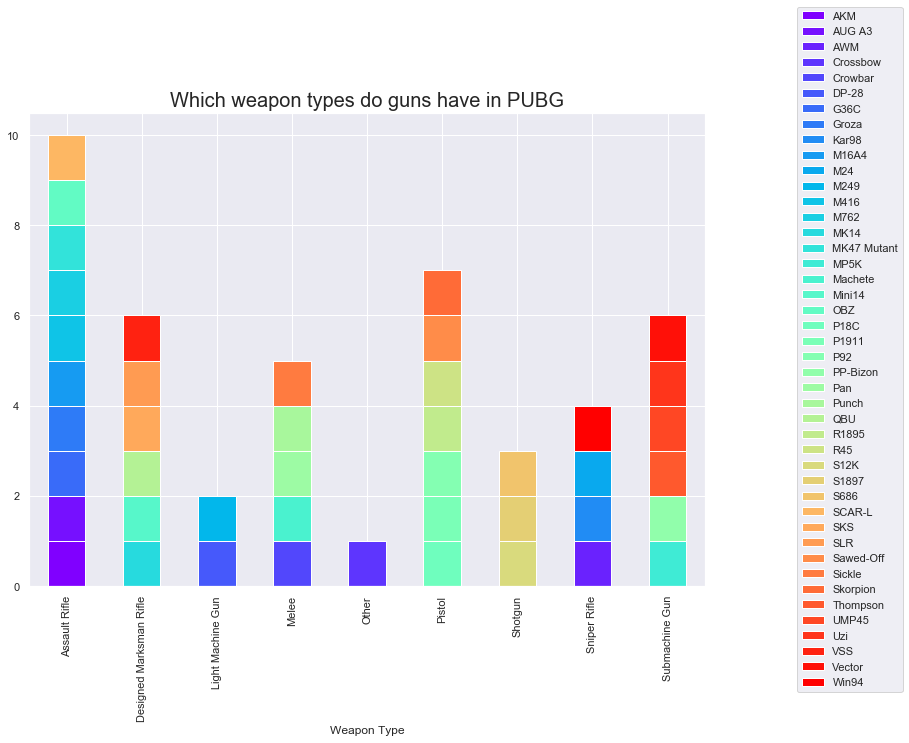

In [34]:
ax = pubg_df_weapon_type.plot(kind='bar', stacked=True,figsize=(13,10), colormap='rainbow')
plt.title('Which weapon types do guns have in PUBG', fontsize=20) 
leg = ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
plt.tight_layout()
plt.savefig('images/image1.png', bbox_inches = "tight")  
plt.show()

10 - Draw a Figure to determine which bullet types are used by weapons

In [35]:
pubg_df["Bullet Type"].unique()

array([ 7.62,  5.56,  9.  ,  0.45, 12.  ,  0.3 ,   nan])

In [36]:
pubg_df["Bullet Type"] = pubg_df["Bullet Type"].astype(str)

In [37]:
pubg_df["Bullet Type"] = pubg_df["Bullet Type"].replace('7.62','7.62 mm')
pubg_df["Bullet Type"] = pubg_df["Bullet Type"].replace('5.56','5.56 mm')
pubg_df["Bullet Type"] = pubg_df["Bullet Type"].replace('9.','9.0 mm')
pubg_df["Bullet Type"] = pubg_df["Bullet Type"].replace('0.45','.45 ACP')
pubg_df["Bullet Type"] = pubg_df["Bullet Type"].replace('12.','12 Gauge')
pubg_df["Bullet Type"] = pubg_df["Bullet Type"].replace('0.3','.300 Magnum')
pubg_df["Bullet Type"] = pubg_df["Bullet Type"].replace('nan','Others')

In [38]:
pubg_df["Bullet Type"].unique()

array(['7.62 mm', '5.56 mm', '9.0', '.45 ACP', '12.0', '.300 Magnum',
       'Others'], dtype=object)

In [39]:
pubg_df_bullet = pubg_df.groupby(["Bullet Type"]).size().reset_index(name='count')

In [40]:
pubg_df_bullet = pubg_df_bullet.sort_values(by = "count", ascending=True)

In [41]:
trace=go.Pie(labels=pubg_df_bullet["Bullet Type"], 
             values=pubg_df_bullet["count"],
            )

layout = go.Layout(title="Which bullet types are used by weapons in PUBG", 
                   height=400, 
                   legend=dict(x=1.1, y=1.3)
                  )

fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(height=500, width=700)
pio.write_image(fig, "images/image2.png")
fig.show()

11 - Draw a Figure to determine which fire Modes are used by weapons

In [42]:
pubg_df_fire_modes = pubg_df.groupby(["Fire Mode"]).size().reset_index(name='count')
pubg_df_fire_modes = pubg_df_fire_modes.sort_values(by = "count", ascending=True)

In [43]:
trace=go.Pie(labels=pubg_df_fire_modes["Fire Mode"], 
             values=pubg_df_fire_modes["count"],
             hole=.5
            )

layout = go.Layout(title="Which fire Modes are used by weapons in PUBG", 
                   height=400, 
                   legend=dict(x=1.1, y=1.3)
                  )

fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(height=500, width=700)
pio.write_image(fig, "images/image3.png")
fig.show()

12 - Draw a Figure to determine which the most lethal weapons are 

In [44]:
pubg_df_most_lethal_weapons = pubg_df.sort_values(by=['Damage'], ascending=False)

In [45]:
pubg_df_most_lethal_weapons = pubg_df_most_lethal_weapons[["Weapon Name","Damage"]]

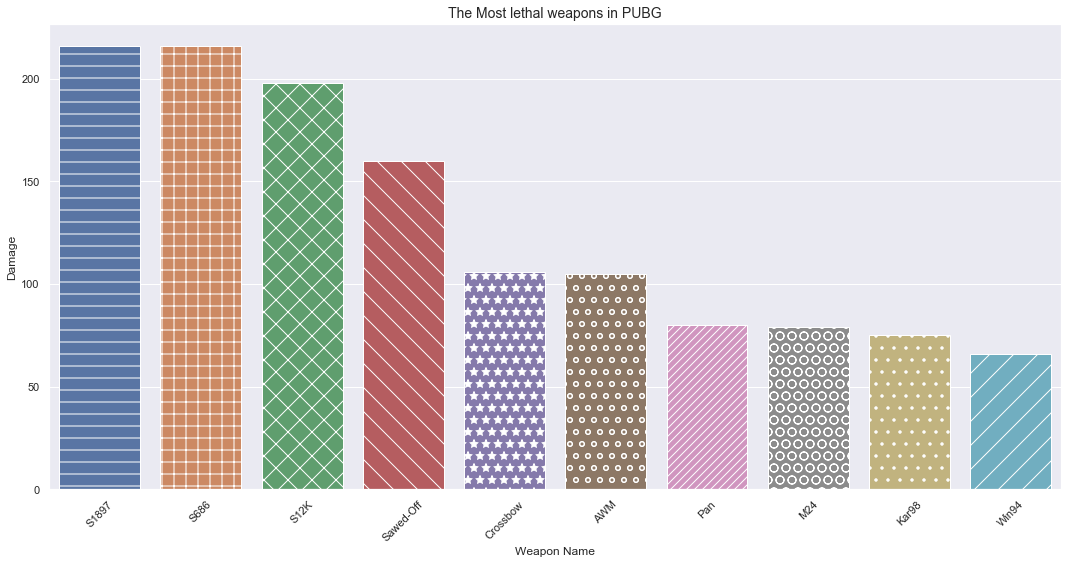

In [46]:
plt.figure(figsize=(15,8))

pubg_df_most_lethal_weapons = pubg_df_most_lethal_weapons.head(10)

bar = sns.barplot(data = pubg_df_most_lethal_weapons, 
            x = "Weapon Name" , 
            y = "Damage")


hatches = ['-', '+', 'x', '\\', '*', 'o','///', 'O', '.','/']

# Loop over the bars
for i,thisbar in enumerate(bar.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])

plt.title("The Most lethal weapons in PUBG", fontsize = 14)
plt.xticks(rotation=45)
plt.savefig('images/image4.png', bbox_inches = "tight")
plt.tight_layout()
plt.show();

13 - Draw a Figure to determine which weapons have more ammo capacity

In [47]:
pubg_df_ammo_capacity = pubg_df.sort_values(by=['Magazine Capacity'], ascending=False)
pubg_df_ammo_capacity = pubg_df_ammo_capacity[["Weapon Name","Magazine Capacity"]]

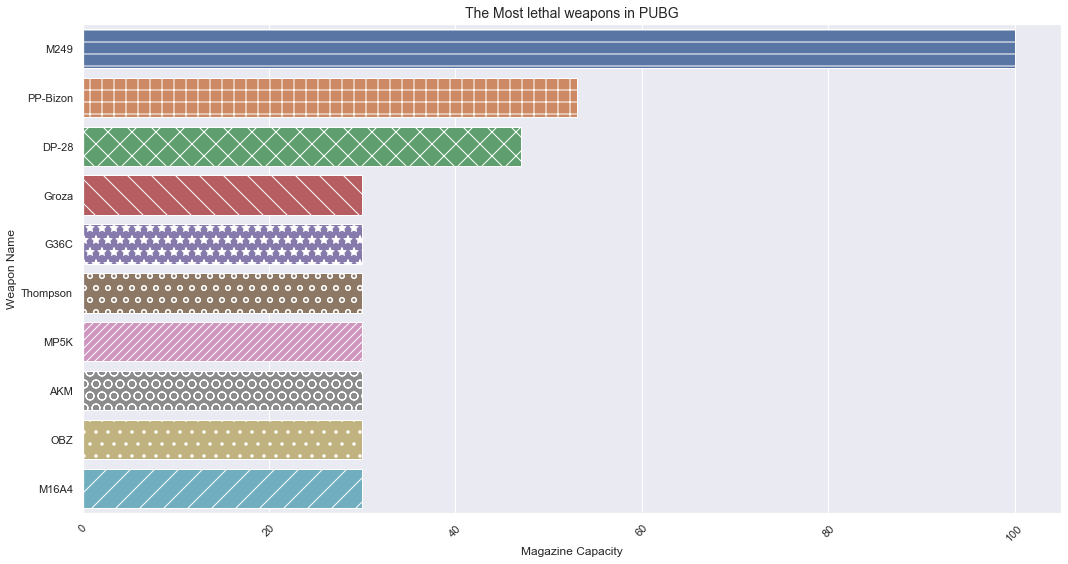

In [48]:
plt.figure(figsize=(15,8))

pubg_df_ammo_capacity = pubg_df_ammo_capacity.head(10)

bar = sns.barplot(data = pubg_df_ammo_capacity, 
            x = "Magazine Capacity" , 
            y = "Weapon Name")


hatches = ['-', '+', 'x', '\\', '*', 'o','///', 'O', '.','/']

# Loop over the bars
for i,thisbar in enumerate(bar.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])

plt.title("The Most lethal weapons in PUBG", fontsize = 14)
plt.xticks(rotation=45)
plt.savefig('images/image5.png', bbox_inches = "tight")
plt.tight_layout()
plt.show();

14 - Draw a Figure to determine which weapons are more useful for Chest Shot

In [49]:
pubg_df_chest_shot = pubg_df.sort_values(['Shots to Kill (Chest)'], ascending = True)
pubg_df_chest_shot = pubg_df_chest_shot[["Weapon Name","Shots to Kill (Chest)"]]
pubg_df_chest_shot = pubg_df_chest_shot.head(10)

In [50]:
data = [go.Bar(
            x = pubg_df_chest_shot["Weapon Name"],
            y = pubg_df_chest_shot["Shots to Kill (Chest)"],
            marker= dict(colorscale='RdBu',
                         color = pubg_df_chest_shot.index.values
                        ),
            text='Shot Count'
    )]

layout = go.Layout(
    title='Which weapons are more useful for Chest Shot',
    xaxis_tickangle=45
)

fig = go.Figure(data=data, layout=layout)
pio.write_image(fig, "images/image6.png")
fig.show()

15 - Draw a Figure to determine which weapons are more useful for Head Shot

In [51]:
pubg_df_head_shot = pubg_df.sort_values(['Shots to Kill (Head)'], ascending = True)
pubg_df_head_shot = pubg_df_head_shot[["Weapon Name","Shots to Kill (Head)"]]
pubg_df_head_shot = pubg_df_head_shot.head(10)

In [52]:
data = [go.Bar(
            x = pubg_df_head_shot["Weapon Name"],
            y = pubg_df_head_shot["Shots to Kill (Head)"],
            marker= dict(colorscale='Jet',
                         color = pubg_df_head_shot.index.values
                        ),
            text='Shot Count'
    )]

layout = go.Layout(
    title='Which weapons are more useful for Head Shot',
    xaxis_tickangle=-45
)

fig = go.Figure(data=data, layout=layout)
pio.write_image(fig, "images/image7.png")
fig.show()

16 - Draw a Figure to show which weapons are more effective by Range,Bullet Speed, Rate of Fire and lastly Damage Per Second

In [53]:
pubg_df_range = pubg_df.sort_values(['Range'], ascending = False)
pubg_df_range = pubg_df_range[["Weapon Name","Range"]]
pubg_df_range = pubg_df_range.head(10)

In [54]:
pubg_df_bullet_speed = pubg_df.sort_values(['Bullet Speed'], ascending = False)
pubg_df_bullet_speed = pubg_df_bullet_speed[["Weapon Name","Bullet Speed"]]
pubg_df_bullet_speed = pubg_df_bullet_speed.head(10)

In [55]:
pubg_df_rate_of_fire = pubg_df.sort_values(['Rate of Fire'], ascending = False)
pubg_df_rate_of_fire = pubg_df_rate_of_fire[["Weapon Name","Rate of Fire"]]
pubg_df_rate_of_fire = pubg_df_rate_of_fire.head(10)

In [56]:
pubg_df_damage_per_second = pubg_df.sort_values(['Damage Per Second'], ascending = False)
pubg_df_damage_per_second = pubg_df_damage_per_second[["Weapon Name","Damage Per Second"]]
pubg_df_damage_per_second = pubg_df_damage_per_second.head(10)

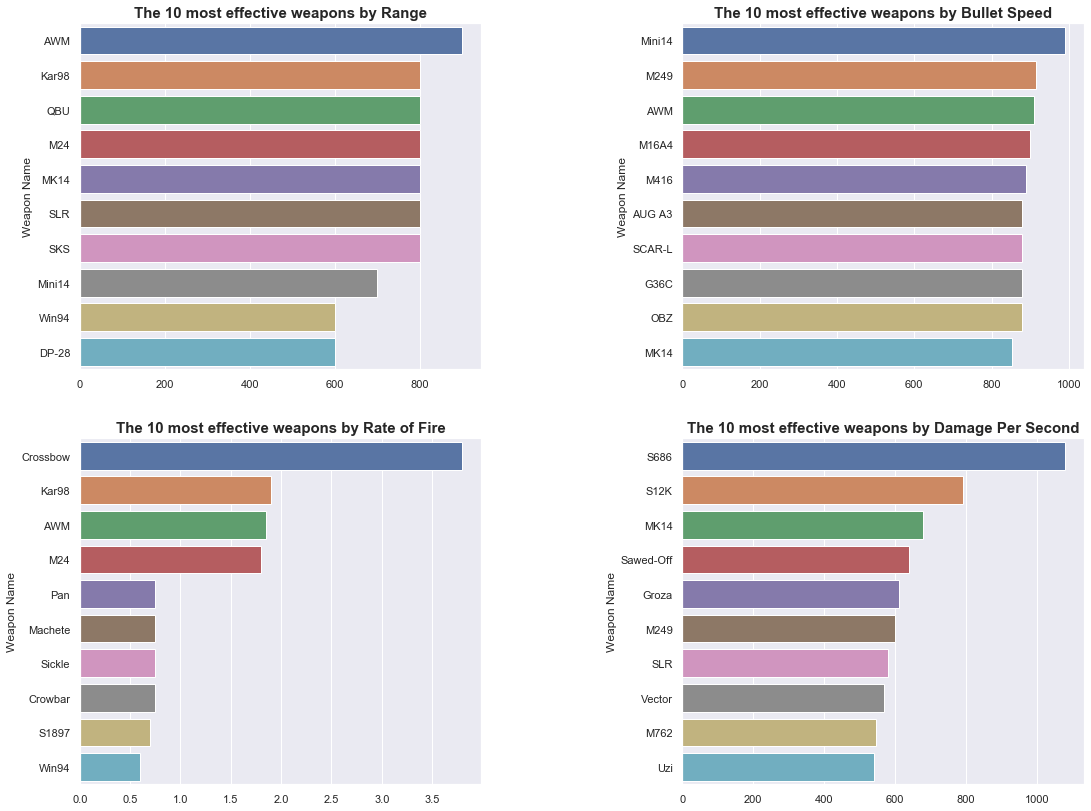

In [57]:
f,a = plt.subplots(2,2,figsize=(18,14))
f.subplots_adjust(wspace = .5)


sns.barplot(data = pubg_df_range, 
            x = "Range" , 
            y = "Weapon Name", ax=a[0,0])
a[0,0].set_title('The 10 most effective weapons by Range', fontsize=15, fontweight='bold')
a[0,0].set_xlabel('')

sns.barplot(data = pubg_df_bullet_speed, 
            x = "Bullet Speed" , 
            y = "Weapon Name", ax=a[0,1])
a[0,1].set_title('The 10 most effective weapons by Bullet Speed', fontsize=15, fontweight='bold')
a[0,1].set_xlabel('');


sns.barplot(data = pubg_df_rate_of_fire, 
            x = "Rate of Fire" , 
            y = "Weapon Name", ax=a[1,0])
a[1,0].set_title('The 10 most effective weapons by Rate of Fire', fontsize=15, fontweight='bold')
a[1,0].set_xlabel('')

sns.barplot(data = pubg_df_damage_per_second, 
            x = "Damage Per Second" , 
            y = "Weapon Name", ax=a[1,1])
a[1,1].set_title('The 10 most effective weapons by Damage Per Second', fontsize=15, fontweight='bold')
a[1,1].set_xlabel('');


plt.savefig('images/image8.png', bbox_inches = "tight")
plt.show()

18 - Define WordCloud graph to show all weapons name in Image

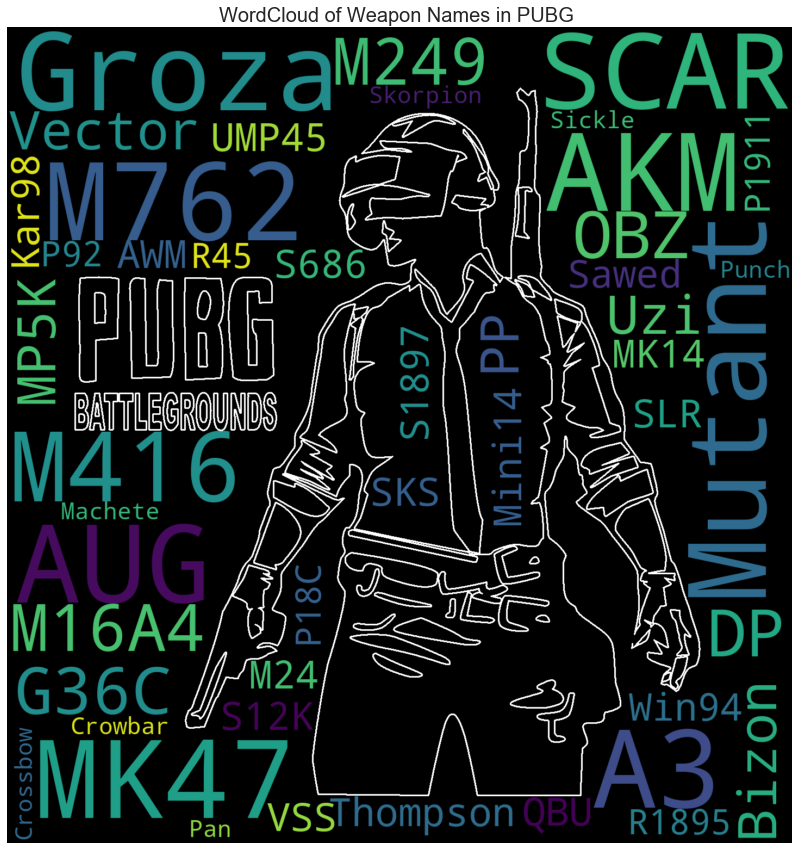

In [58]:
plt.figure(figsize=[15, 15])

image = Image.open("images/pubg.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)


wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black', 
                        #width=1000,  
                        #height=1000, 
                        max_words=300,
                        mask=char_mask,
                        contour_width=3, 
                        contour_color='white',
                    ).generate(' '.join(pubg_df['Weapon Name']))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Weapon Names in PUBG ', fontsize=20)
plt.savefig('images/image9.png')
plt.show()